Treinando uma rede neural
=========================



## Introdução



Depois de uma longa jornada, finalmente chegamos ao *season finale* da nossa saga para construir uma rede neural artificial em Python puro. Agora que já conseguimos criar uma rede neural, o próximo passo é treinar essa rede.



## Objetivo



Treinar uma rede neural artificial tipo Multilayer Perceptron usando Python.



## Importações



In [1]:
import random
from classes import Valor
from funcoes import plota_grafo

%load_ext nb_js_diagrammers

## Código e discussão



### Classes



Abaixo estão as classes que criamos no notebook anterior. Elas são as classes de base para criarmos nossa rede neural MLP. Ao longo deste notebook vamos fazer as últimas modificações nelas.



In [2]:
class Neuronio:
    def __init__(self, num_dados_entrada):
        pesos = []

        for _ in range(num_dados_entrada):
            peso = Valor(random.uniform(-1, 1))
            pesos.append(peso)

        self.pesos = pesos
        self.vies = Valor(random.uniform(-1, 1))

    def __call__(self, x):
        """Executa a computação interna do neurônio.

        Args:
          x: lista de valores de entrada (informação que chega ao neurônio).

        Returns:
          Informação que o neurônio propaga adiante. Trata-se da
          aplicação da função de ativação à soma de `x` vezes os pesos do
          neurônio adicionado ao viés.
        """
        assert len(x) == len(self.pesos), "Seu x tem tamanho errado."

        soma = 0
        for x_, p in zip(x, self.pesos):
            soma = soma + x_ * p

        soma = soma + self.vies
        dado_de_saida = soma.sig()
        return dado_de_saida
    
    def parametros(self):
        return self.pesos + [self.vies]


class Camada:
    def __init__(self, num_dados_entrada, num_neuronios):
        neuronios = []

        for _ in range(num_neuronios):
            neuronio = Neuronio(num_dados_entrada)
            neuronios.append(neuronio)

        self.neuronios = neuronios

    def __call__(self, x):
        """Executa a computação de cada neurônio da camada.

        Args:
          x: lista de valores de entrada (informação que chega aos neurônios).

        Returns:
          Informação que os neurônios da camada propagam adiante.
        """
        saidas = []

        for neuronio in self.neuronios:
            informacao = neuronio(x)
            saidas.append(informacao)

        if len(saidas) == 1:
            return saidas[0]
        else:
            return saidas
    
    def parametros(self):
        params = []
        for neuronio in self.neuronios:
            params.extend(neuronio.parametros())
        return params


class MLP:
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):

        percurso = [num_dados_entrada] + num_neuronios_por_camada
        camadas = []

        for i in range(len(num_neuronios_por_camada)):
            camada = Camada(percurso[i], percurso[i+1])
            camadas.append(camada)

        self.camadas = camadas

    def __call__(self, x):
        """Executa a computação de cada camada.

        Como a rede MLP é uma rede feedforward, a informação que uma camada
        recebe é a informação de saída da camada anterior. A única exceção é a
        camada de entrada, onde a informação é fornecida pelo usuário

        Args:
          x: informação fornecida na camada de entrada.

        Returns:
          Informação recuperada na camada de saída.
        """
        for camada in self.camadas:
            x = camada(x)
        return x
    
    def parametros(self):
        params = []
        for camada in self.camadas:
            params.extend(camada.parametros())
        return params

### A função de perda (*loss function*)



Fomos ao laboratório e sintetizamos 4 amostras de [complete com o que quiser]. Cada uma dessas amostras foi feita variando 3 parâmetros de processamento diferentes. Estas amostras e seus parâmetros de processamento estão representados na variável `x` abaixo.

Levamos essas 4 amostras no equipamento [complete com o que quiser] e obtivemos uma resposta que está representada na variável `y_true` abaixo.



In [3]:
x = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

y_true = [1, 0, 0.2, 0.5]

Queremos treinar uma MLP que seja capaz de modelar o comportamento que observamos. Isto é, queremos uma rede neural que receba informação sobre os 3 parâmetros de processamento e que com isso seja capaz de prever qual o resultado que teríamos no equipamento que mencionamos no parágrafo anterior.

Vamos, primeiramente, criar uma rede neural simples do tipo MLP.



In [4]:
NUM_DADOS_DE_ENTRADA = 3  # são 3 parâmetros que descrevem cada amostra
NUM_DADOS_DE_SAIDA = 1    # queremos apenas um valor de saída por amostra
CAMADAS_OCULTAS = [3, 2]  # fique à vontade para alterar aqui

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]

minha_mlp = MLP(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

Com nossa rede criada, podemos realizar uma previsão! Mas muito provavelmente esta previsão será bastante subótima.



In [5]:
y_pred = []

for x_ in x:
    valor_previsto = minha_mlp(x_)
    y_pred.append(valor_previsto)

print(y_true)
print(y_pred)

[1, 0, 0.2, 0.5]
[Valor(data=0.5458422617793126), Valor(data=0.5956421131465106), Valor(data=0.555858843789926), Valor(data=0.5585867433654196)]


Nosso resultado, assim como esperado, é bastante subótimo. Mas como quantificar isso? Seria bom se existisse uma forma de quantificar em um único número o quão boa está a previsão da minha rede.

Uma forma de quantificar a qualidade da previsão é usando uma `função de perda`, mais conhecida como `loss function`. Aqui podemos, por exemplo, computar a soma dos erros quadráticos. Esta é uma função de perda muito usada em problemas de regressão.



In [6]:
erros_quadrados = []

for yt, yp in zip(y_true, y_pred):
    erro_quadratico = (yp - yt) ** 2
    erros_quadrados.append(erro_quadratico)

loss = sum(erros_quadrados)
print(loss)

Valor(data=0.6911167013410394)


A variável `loss` é uma medida da performance da rede neural que criamos. Essa variável é uma instância de `Valor`, logo podemos facilmente observar o grafo computacional desta métrica.



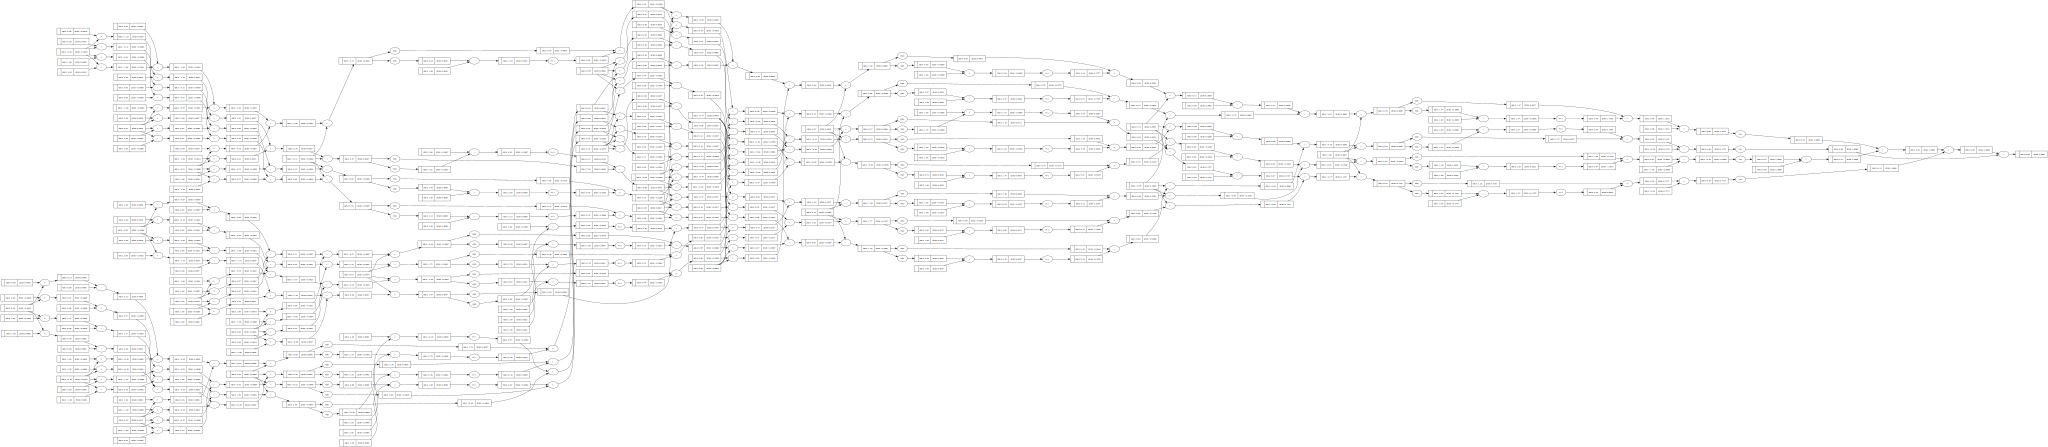

In [7]:
loss.propagar_tudo()
grafo = plota_grafo(loss)
grafo.render("rede_neural", format="png")
grafo

### Treinando a rede através da atualização dos parâmetros



Como vimos acima, o grafo computacional da nossa rede neural é bastante complexo! Cheio de vértices!

Nosso objetivo é treinar a rede neural que criamos, sendo que para isso precisamos alterar os parâmetros internos da rede. O primeiro passo para fazer isso é alterar as nossas classes de forma que o código abaixo funcione.



In [8]:
parametros = minha_mlp.parametros()

print(len(parametros))
print()
parametros

23



[Valor(data=0.45728039135563137),
 Valor(data=-0.48998890200212464),
 Valor(data=0.25391298452793243),
 Valor(data=0.5914223479844218),
 Valor(data=-0.613764996325975),
 Valor(data=0.9657483578399237),
 Valor(data=-0.5053278227263376),
 Valor(data=-0.10589324670554534),
 Valor(data=-0.8659887603062311),
 Valor(data=0.9713714825442581),
 Valor(data=0.6788472249139534),
 Valor(data=0.5374970942876935),
 Valor(data=0.993848113962976),
 Valor(data=-0.9226852120999838),
 Valor(data=-0.7738765992221817),
 Valor(data=0.6660358366452648),
 Valor(data=0.1798210284705788),
 Valor(data=0.8426591093310505),
 Valor(data=0.5551251369870285),
 Valor(data=0.7469365762797946),
 Valor(data=0.13767837301822228),
 Valor(data=-0.990318654334132),
 Valor(data=0.9954452982551043)]

Agora que conseguimos &ldquo;extrair&rdquo; os parâmetros da nossa MLP, podemos fazer o treino deles! Temos que pensar bem como alterar os parâmetros da maneira correta. Lembre-se que nosso desejo é reduzir a métrica computada pela função de perda.



In [9]:
TAXA_DE_APRENDIZADO = .001

for p in minha_mlp.parametros():
    p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

#Agora que executamos um &ldquo;ciclo&rdquo; de treino, podemos observar o impacto disso!

y_pred = []
for x_ in x:
    valor_previsto = minha_mlp(x_)
    y_pred.append(valor_previsto)

erros_quadrados = []
for yt, yp in zip(y_true, y_pred):
    erro_quadratico = (yp - yt) ** 2
    erros_quadrados.append(erro_quadratico)

loss = sum(erros_quadrados)
loss.propagar_tudo()
print(loss)

Valor(data=0.6909421091830181)


### A descida do gradiente



Apenas um &ldquo;ciclo&rdquo; de treino costuma não ser suficiente para treinarmos uma rede neural, precisamos de mais! Antes de seguir em frente, vamos definir um termo: chamamos de `época` toda vez que nossa rede neural propaga *todo* nosso dataset. É comum treinarmos redes neurais por dezenas, centenas e até milhares de épocas!

Vamos programar um treino completo da rede neural!

Um detalhe: sempre temos que zerar os gradientes antes de fazer o backpropagation. Isso é necessário pois cada vez que alteramos os parâmetros estaremos em outra posição da curva de perda e os gradientes antigos já não são mais válidos.



In [10]:
NUM_DADOS_DE_ENTRADA = 3  # são 3 parâmetros que descrevem cada amostra
NUM_DADOS_DE_SAIDA = 1    # queremos apenas um valor de saída por amostra
CAMADAS_OCULTAS = [3, 2]  # fique à vontade para alterar aqui

x = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

y_true = [1, 0, 0.2, 0.5]

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]
minha_mlp = MLP(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

In [11]:
NUM_EPOCAS = 100
TAXA_DE_APRENDIZADO = .01

for epoca in range(NUM_EPOCAS):
    # forward pass
    y_pred = [minha_mlp(x_) for x_ in x]

    # zero grad
    for p in minha_mlp.parametros(): p.grad = 0
    
    # loss
    loss = sum([(yp - yt)**2 for yp, yt in zip(y_pred, y_true)])

    # backpropagation
    loss.propagar_tudo()

    # atualiza parâmetros
    for p in minha_mlp.parametros(): p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

    # mostra resultado
    print(f'Época {epoca+1}: {loss.data}')

Época 1: 0.7507794891318188
Época 2: 0.7484881182612458
Época 3: 0.7462147306271285
Época 4: 0.7439593670174991
Época 5: 0.7417220638580349
Época 6: 0.7395028532475557
Época 7: 0.7373017629957849
Época 8: 0.7351188166633138
Época 9: 0.7329540336036886
Época 10: 0.7308074290075545
Época 11: 0.7286790139487724
Época 12: 0.7265687954324493
Época 13: 0.7244767764447844
Época 14: 0.7224029560046741
Época 15: 0.7203473292169864
Época 16: 0.7183098873274292
Época 17: 0.7162906177789348
Época 18: 0.7142895042694841
Época 19: 0.7123065268112857
Época 20: 0.7103416617912373
Época 21: 0.7083948820325873
Época 22: 0.7064661568577209
Época 23: 0.7045554521519893
Época 24: 0.7026627304285094
Época 25: 0.7007879508938526
Época 26: 0.6989310695145502
Época 27: 0.6970920390843397
Época 28: 0.6952708092920746
Época 29: 0.6934673267902314
Época 30: 0.691681535263934
Época 31: 0.6899133755004281
Época 32: 0.6881627854589404
Época 33: 0.6864297003408442
Época 34: 0.6847140526600748
Época 35: 0.683015772313

Após o treino, podemos checar se nossa rede é capaz de prever os dados que coletamos com boa performance.



In [12]:
print(y_true)
print(y_pred)

[1, 0, 0.2, 0.5]
[Valor(data=0.5466430940704475), Valor(data=0.5449203600215045), Valor(data=0.5166666991627), Valor(data=0.5489160196795179)]


Esse processo de atualizar os parâmetros da rede neural observando os gradientes locais é chamado de `descida do gradiente` (ou apenas `método do gradiente`).



## Conclusão

O objetivo deste notebook, era utilizar as classes criadas no experimento anterior, `Neurônio`; `Camada` e `MLP`, e treinar uma Rede Neural utilizando toda a estrutura produzida nestas classes. Para isso, as classes são redefinidas dentro deste notebook para serem utilizadas novamente e uma Rede Neural é criada com valores inicialmente aleatórios para seus pesos e viéses.

Após sua criação, pode iniciar-se o processo de treinamento, que consiste em "alimentar" os dados de `input` (entrada) para a rede e comparar os dados de `output` (saída) gerados pela rede com os dados reais gerados por tais valores de `input` pelo fenômeno que se quer prever. Com esta comparação, é possível definir a eficácia da rede em prever os dados, e inicialmente se espera que a rede consiga prever os dados de forma eficaz, por isso é necessário seu treinamento. Através de uma série de 5 etapas conhecidas como `forward pass`, `zero grad`, `loss`, `backpropagation` e `parameter update`, é possível treinar uma rede. Cada etapa está definida a seguir:

<table style='border: 1px solid white; border-collapse: collapse; color: #ffffff; text-align: center; width: 99%'>
    <tr style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>
        <th style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>Etapa</th>
        <th style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>Forward pass</th>
        <th style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>Zero grad</th>
        <th style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>Loss</th>
        <th style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>Backpropagation</th>
        <th style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>Parameter update</th>
    </tr>
    <tr style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>
        <th style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>Processo</th>
        <td style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>Os dados são "Alimentados" a rede, de modo que todos os valores de cada neurônio são calculados e passaos a frente, desta forma, obteremos os valores de saída calculados pela rede. Inicialmente, espera-se que os dados de saida não estejam proximos de seus valores reais, justamente por conta da falta de treino da rede.</td>
        <td style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>Todos os gradientes locais de cada peso e viés dentro da rede é setado (mudado) para 0, para que seu novo valor possa ser calculado na etapa de <em>Backpropagation</em>. Inicialmente esses valores ja começam setados como 0 quando a rede é criada.</td>
        <td style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>Calcula-se função de perda da rede, ou seja, calcula-se o erro da predição da rede neural com relação aos valores reais. Com isso, pode-se saber o quão "errada" a rede está ou o quão "proximo" a rede está de acertar os valores reais.</td>
        <td style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>É feito o calculo das derivadas locais de cada peso e viés de modo retrógrado ao ao calculo dos valores na etapa de <em>Forwardpass</em>, deste modo, pode-se saber quanto cada parâmetro da rede (pesos e viéses) altera o valor final. Este dado é necessário para a próxima e última etapa, de <em>Parameter update</em>.</td>
        <td style='border: 1px solid white; border-collapse: collapse; background-color: #000000;'>Esta é a ultima etapa de uma iteração de treino (mas o treino não acaba aqui!) e a que mudará realmente a rede neural tentando aprimorá-la para a predição dos dados. Nela, cada parâmetro da rede é alterado de acordo com seu gradiente local, a fim de diminuir a perda da rede e possivelmente melhorar sua predição como um todo.</td>
    </tr>
</table>

Estas etapas podem ser seguidas para treinar uma rede neural, porém, não basta fazer isto apenas uma vez, é necessária uma série de iterações seguidas dessas etapas para que a rede seja realmente treinada.

Com isto, podemos concluir que o processo de aprendizagem de uma rede neural é complexo e sequencial, sendo necessário uma série de etapas para que seja possível seu treinamento para a resolução de um problema em questão. O notebook conseguiu atingir este objetivo, e de maneira positiva, pois o treinamento da rede gerou resutados condizentes com os valores reais esperados.

## Playground



In [13]:
%%mermaid_magic -h 200
%%{init: {'theme':'dark'}}%%

graph LR
    A[Forwardpass:\n\nOs dados de inputs são Alimentados a rede, de modo]
    B[Zero grad]
    C[Loss]
    D[Backpropagation]
    E[Parameter Update]
    
    A --> B; B --> C; C --> D; D --> E

In [14]:
?str

Init signature: str(self, /, *args, **kwargs)
Docstring:     
str(object='') -> str
str(bytes_or_buffer[, encoding[, errors]]) -> str

Create a new string object from the given object. If encoding or
errors is specified, then the object must expose a data buffer
that will be decoded using the given encoding and error handler.
Otherwise, returns the result of object.__str__() (if defined)
or repr(object).
encoding defaults to sys.getdefaultencoding().
errors defaults to 'strict'.
Type:           type
Subclasses:     DeferredConfigString, _rstr, LSString, include, ColorDepth, Keys, InputMode, CompleteStyle, SortKey, NoHtml, ...


In [15]:
oi = 'bhjsbjbdsj'
%echo oi

oi


In [16]:
#sum([(yp - yt)**2 for yp, yt in zip([minha_mlp(x_) for x_ in x], y_true)]).propagar_tudo()